In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn import linear_model
import copy

In [3]:
#!/bin/bash
!curl -L -o boston-house-prices.zip\
  https://www.kaggle.com/api/v1/datasets/download/vikrishnan/boston-house-prices

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 13146  100 13146    0     0  35387      0 --:--:-- --:--:-- --:--:-- 35387


In [4]:
!unzip boston-house-prices.zip

Archive:  boston-house-prices.zip
  inflating: housing.csv             


In [9]:
df = pd.read_csv('housing.csv', header=None, sep="\s+")
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [10]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [11]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

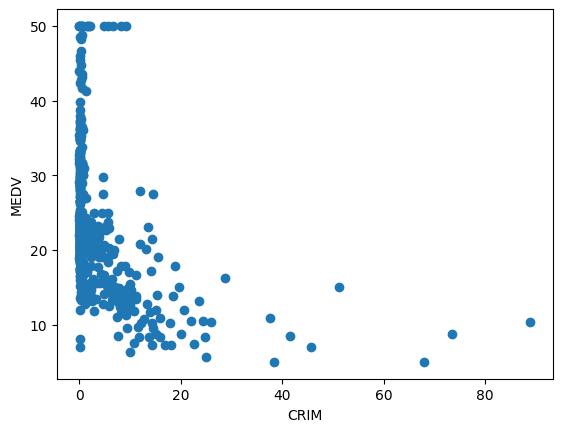

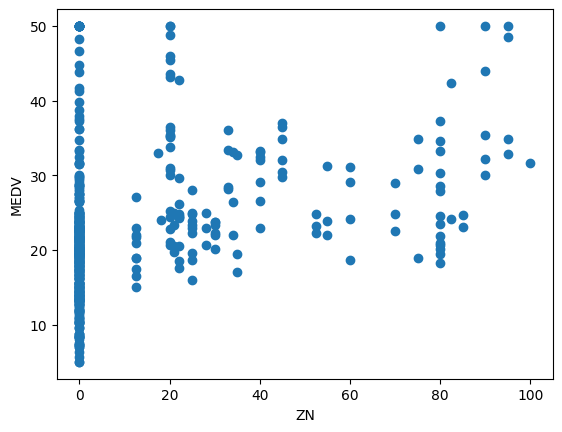

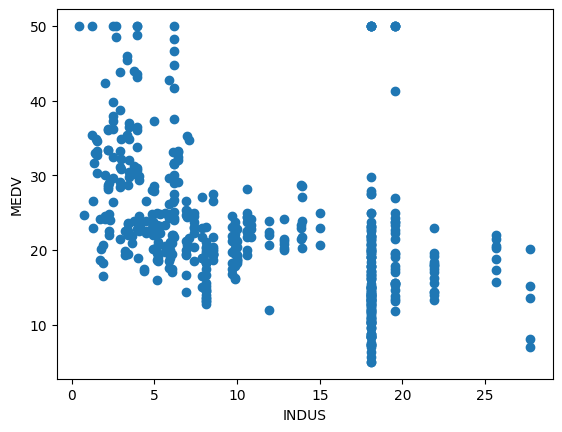

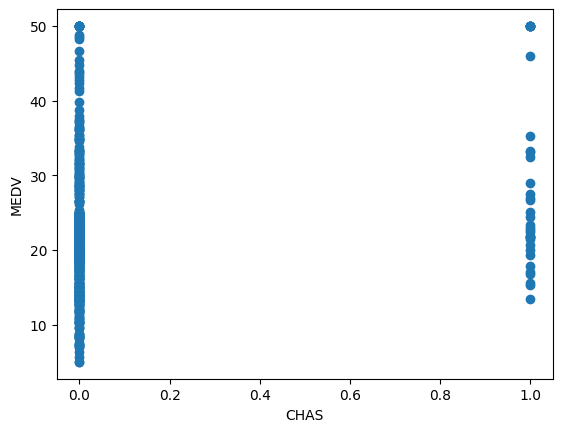

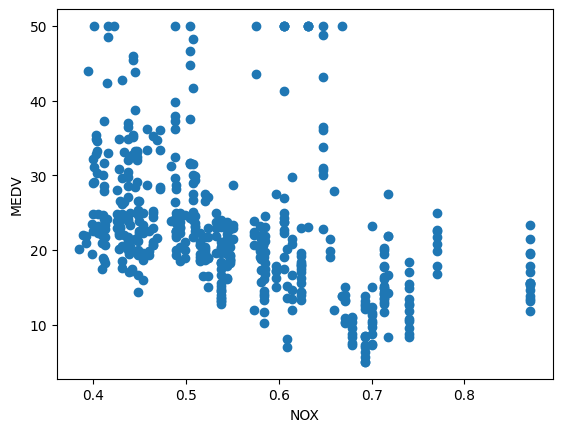

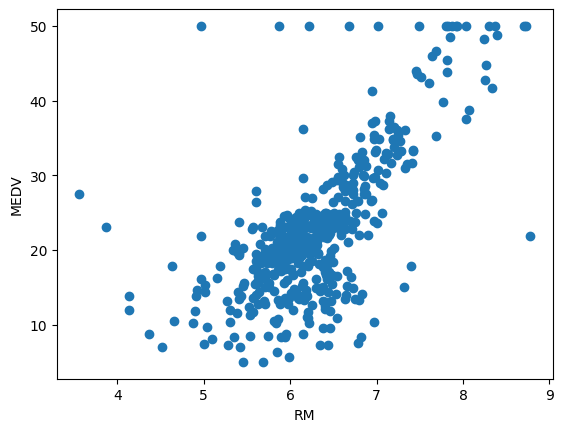

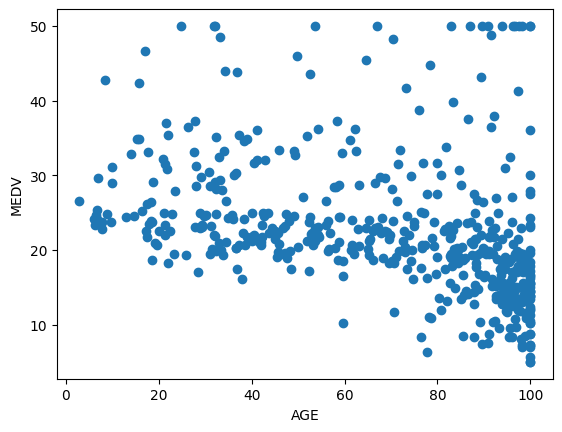

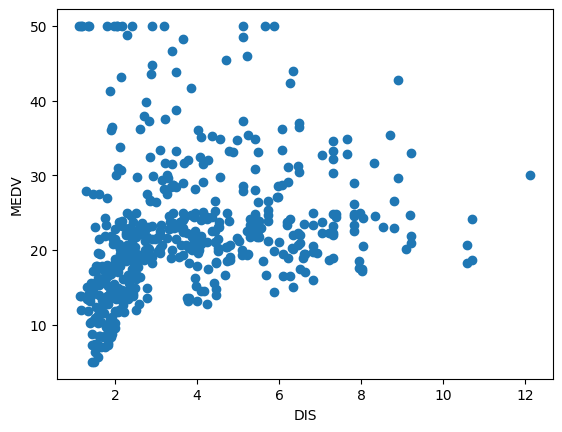

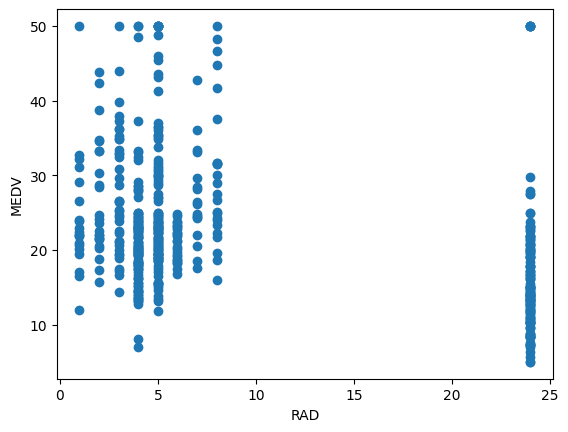

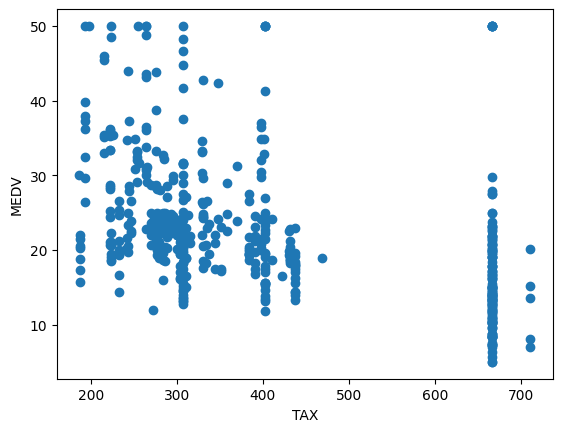

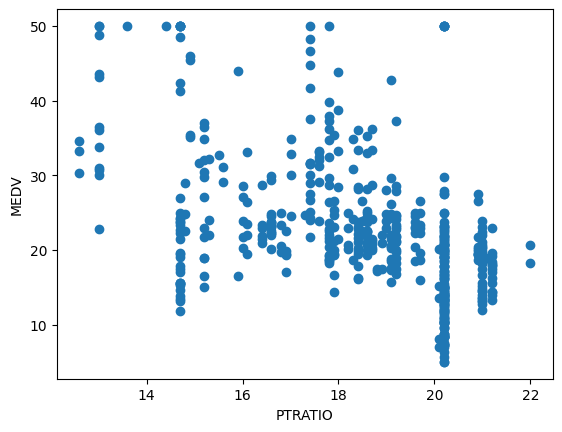

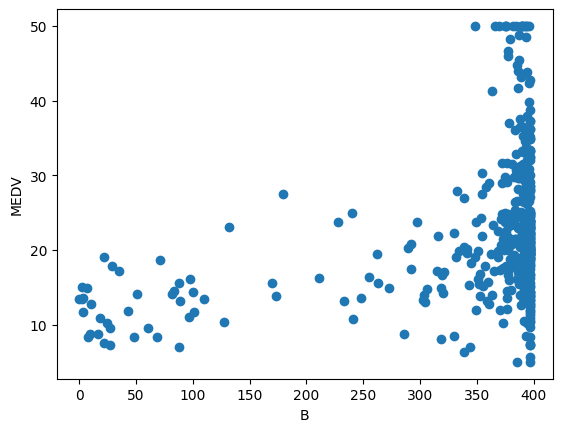

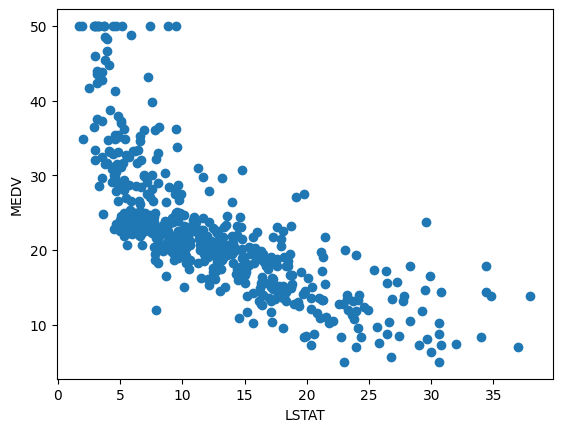

In [17]:
for label in X.columns:
    plt.scatter(X[label], y)
    plt.xlabel(label)
    plt.ylabel('MEDV')
    plt.show()

In [18]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [16]:
def get_xy(df, y_label, x_labels=None):
  df = copy.deepcopy(df)
  if x_labels is None:
    X = df[[c for c in df.columns if c != y_label]].values
  else:
    if len(x_labels) == 1:
      X = df[x_labels[0]].values.reshape(-1, 1)
    else:
      X = df[x_labels].values

    y = df[y_label].values.reshape(-1, 1)

    data = np.hstack((X, y))

  return data, X, y


In [22]:
_, X_train, y_train = get_xy(train, 'MEDV', x_labels=['RM'])
_, X_val, y_val = get_xy(val, 'MEDV', x_labels=['RM'])
_, X_test, y_test = get_xy(test, 'MEDV', x_labels=['RM'])

# Linear Regression

In [23]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
model.score(X_test, y_test)

0.5906798540729867

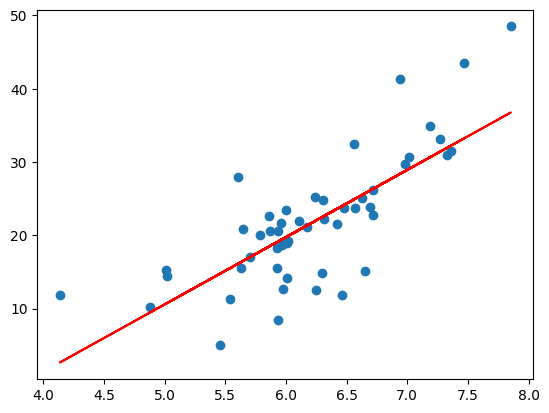

In [30]:
plt.scatter(X_test, y_test)
plt.plot(X_test, model.predict(X_test), color='red')
plt.show()